In [1]:
import pandas as pd
import numpy as np
import csv
from sklearn import preprocessing
from sklearn import metrics, ensemble
from sklearn.feature_extraction.text import CountVectorizer

In [2]:
# This function should transform data into a usable format 
def audioProcess(path):
    data = pd.read_csv(path)
    #get audio data from loudness to vect148
    audioData = data.loc[:, "loudness":"vect_148"]
    
    # normalization
    audioData=(audioData-audioData.mean())/audioData.std()
    
    return audioData.values.tolist()

In [3]:
# This function should transform data into a usable format 
def textProcess(path):
    data = pd.read_csv(path)
    #get audio data from vect1 to vect148
    textData = data.loc[:, "tags"]
    
    return textData.values.tolist()

In [4]:
# This function should transform data into a usable format 
def labelProcess(path):
    data = pd.read_csv(path)
    #get classes
    labels = data.loc[:,"genre"].values.tolist()
    
    
    return labels

In [5]:
def train(trainData, trainLabel, model):
    model.fit(trainData, trainLabel)
                 
    print("train finish")

In [6]:
def predict(testData, model):
    prediction = model.predict(testData)
    return prediction

In [7]:
def evaluate(test_label, prediction):
    accuracy = metrics.accuracy_score(test_label, prediction)
    return accuracy

DATA Preprocess

In [8]:
trainText = np.array(textProcess(r"D:\Unimelb\Introduction to Machine Learning\assignment2\dataset\dataset\train_features.csv"))
validText= np.array(textProcess(r"D:\Unimelb\Introduction to Machine Learning\assignment2\dataset\dataset\valid_features.csv"))
testText = np.array(textProcess(r"D:\Unimelb\Introduction to Machine Learning\assignment2\dataset\dataset\test_features.csv"))

In [9]:
#Create BOW
trainTxt = []
validTxt = []
testTxt = []
for i in range(len(trainText)):
    trainTxt.append(trainText[i].replace(",", ""))
    
for i in range(len(validText)):
    validTxt.append(validText[i].replace(",", ""))   
    
for i in range(len(testText)):
    testTxt.append(testText[i].replace(",", ""))   
    
vectorizer = CountVectorizer() 
trainVectors = vectorizer.fit_transform(trainTxt)
validVectors = vectorizer.transform(validTxt)
testVectors = vectorizer.transform(testTxt)

In [11]:
trainAudio = np.array(audioProcess(r"D:\Unimelb\Introduction to Machine Learning\assignment2\dataset\dataset\train_features.csv"))
validAudio = np.array(audioProcess(r"D:\Unimelb\Introduction to Machine Learning\assignment2\dataset\dataset\valid_features.csv"))
testAudio = np.array(audioProcess(r"D:\Unimelb\Introduction to Machine Learning\assignment2\dataset\dataset\test_features.csv"))

In [12]:
trainData = np.column_stack((trainVectors.toarray(),trainAudio))
validData = np.column_stack((validVectors.toarray(),validAudio))
testData = np.column_stack((testVectors.toarray(),testAudio))

In [13]:
trainLabel = labelProcess(r"D:\Unimelb\Introduction to Machine Learning\assignment2\dataset\dataset\train_labels.csv")
validLabel = labelProcess(r"D:\Unimelb\Introduction to Machine Learning\assignment2\dataset\dataset\valid_labels.csv")

Training

In [14]:
n_estimators = 77
forest = ensemble.RandomForestClassifier(n_estimators = n_estimators)
train(trainData, trainLabel, forest)

train finish


In [15]:
prediction = predict(validData, forest)

In [16]:
accuracy = evaluate(validLabel, prediction)
print(accuracy)

0.64


Predict

In [17]:
trackID = pd.read_csv(r"D:\Unimelb\Introduction to Machine Learning\assignment2\dataset\dataset\test_features.csv").loc[:, "trackID"].values.tolist()
prediction = predict(testData, forest)

In [18]:
result = list(zip(trackID,prediction))

In [20]:
with open("all_RF_outPut.csv", 'w', newline='') as csvFile:
    writer = csv.writer(csvFile)
    writer.writerow(["trackID", "genre"])
    writer.writerows(result)

n_estimators optimization

In [17]:
#training
accuracies=[]

for k in range(1,101):
    forest = ensemble.RandomForestClassifier(n_estimators = k)
    forest.fit(trainData, trainLabel)
    prediction = forest.predict(validData)
    accuracy = metrics.accuracy_score(validLabel, prediction)
    accuracies.append(accuracy)

The optimal value for n_estimators is 77


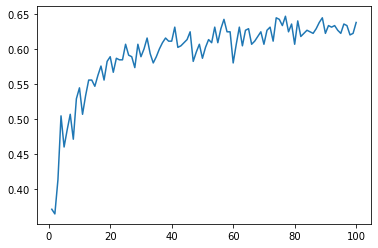

In [18]:
import matplotlib.pyplot as plt
plt.plot(range(1,101), accuracies)
print("The optimal value for n_estimators is {}".format(accuracies.index(max(accuracies)) + 1))

In [19]:
max(accuracies)

0.6466666666666666